In [1]:
import pandas as pd
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
from astropy.timeseries import LombScargle
import os

## Campo b279

In [18]:
# Especifica la ruta completa o relativa de tu archivo .dat
archivo_dat = 'datosEpocas.dat'

# Usa pandas para cargar los datos en un DataFrame, utilizando espacio como delimitador
datos_df = pd.read_csv(archivo_dat, delimiter=' ')

# Filtrar las filas donde "campo" es igual a "b278" y "banda" es igual a "Ks"
columna_campo_filtrada1 = datos_df.loc[(datos_df['campo'] == 'b279') & (datos_df['banda'] == 'Ks')]
# Ordenar el DataFrame según la columna "lineas" de mayor a menor
columna_campo_filtrada_ordenada1 = columna_campo_filtrada1.sort_values(by='lineas', ascending=False)
# Guardar la columna "HJD" como un array
array_HJD1 = columna_campo_filtrada_ordenada1['HJD'].to_numpy()


# Crear un objeto HDU (Header Data Unit) de tipo ImageHDU
hdu = fits.ImageHDU(array_HJD1, name='HJD')

# Crear un objeto HDUList que contiene el HDU
hdul = fits.HDUList([fits.PrimaryHDU(), hdu])

# Especificar el nombre del archivo FITS
nombre_archivo = 'Totalcampob279.fits'

# Guardar el archivo FITS
hdul.writeto(nombre_archivo, overwrite=True)

# Imprimir un mensaje de confirmación
print(f"Archivo FITS creado con array_HJD: {nombre_archivo}")

Archivo FITS creado con array_HJD: Totalcampob279.fits


In [3]:
# Especifica la ruta completa o relativa de tu archivo .dat
archivo_dat = 'superTemplateb279.dat'

# Usa pandas para cargar los datos en un DataFrame, utilizando espacio como delimitador
datos_df = pd.read_csv(archivo_dat, delimiter=' ')

# Inicializar un array para almacenar los valores de las columnas que empiezan con 'Ks' para todas las filas
valores_Ks = []

# Iterar sobre las filas del DataFrame
for index, fila in datos_df.iterrows():
    # Filtrar las columnas que empiezan con 'Ks'
    columnas_con_Ks = [columna for columna in fila.index if columna.startswith('Ks')]
    
    # Crear un array con los valores de las columnas que empiezan con 'Ks'
    valores_Ks_fila = fila[columnas_con_Ks].to_numpy()
    
    # Agregar el array de valores al array general
    valores_Ks.append(valores_Ks_fila)

# Convertir el array general a un array de NumPy
valores_Ks = np.array(valores_Ks)

# Especifica el nombre del archivo FITS existente
nombre_archivo_fits = 'campob279.fits'

# Abre el archivo FITS existente en modo de actualización ('update')
with fits.open(nombre_archivo_fits, mode='update') as hdul:
    # Crea un nuevo HDU con el nuevo array
    nuevo_hdu = fits.ImageHDU(valores_Ks, name='Series Ks')

    # Agrega el nuevo HDU al archivo FITS
    hdul.append(nuevo_hdu)

# Imprime un mensaje de confirmación
print(f"Nuevo HDU agregado al archivo FITS: {nombre_archivo_fits}")

Nuevo HDU agregado al archivo FITS: campob279.fits


In [2]:
nombre_archivo1 = fits.open('campob279.fits')
nombre_archivo1.info()

Filename: campob279.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  HJD           1 ImageHDU         7   (68,)   float64   
  2  SERIES KS     1 ImageHDU         8   (68, 1280954)   float64   


In [3]:
series_ks=nombre_archivo1[2].data
# Inicializar un nuevo array para almacenar las medias
medias = np.zeros(series_ks.shape[0])

# Calcular la media de cada array y almacenarla en el nuevo array
for i in range(series_ks.shape[0]):
    medias[i] = np.nanmean(series_ks[i])

print("Medias de cada array sin tener en cuenta los valores NaN:")
print(medias)

C:\Users\camil\AppData\Local\Temp\ipykernel_14264\315417309.py:7: RuntimeWarning: Mean of empty slice
  medias[i] = np.nanmean(series_ks[i])


Medias de cada array sin tener en cuenta los valores NaN:
[14.38  15.974 16.315 ...    nan    nan    nan]


In [4]:
# Función para calcular la MAD de una fila
def mad(fila):
    # Calcular la mediana de la fila ignorando NaN
    median = np.nanmedian(fila)
    # Calcular las desviaciones absolutas ignorando NaN
    deviations = np.abs(fila - median)
    # Calcular la mediana de las desviaciones absolutas ignorando NaN
    mad_result = np.nanmedian(deviations)
    return mad_result

# Calcular la MAD para cada fila y almacenarla en un nuevo array
mad_results = np.apply_along_axis(mad, 1, series_ks)




C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


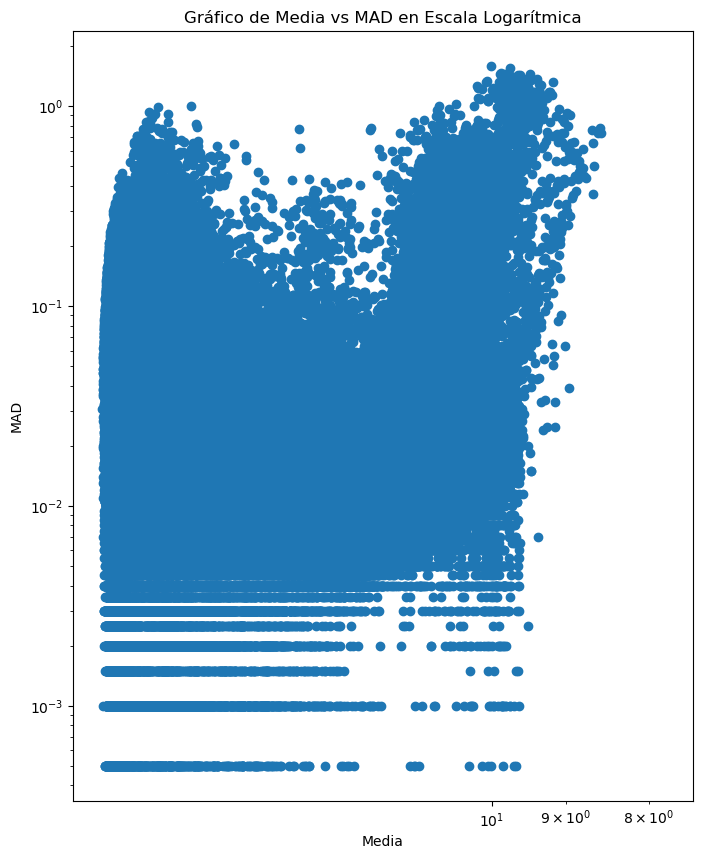

In [5]:
# Graficar los resultados
plt.figure(figsize=(8, 10))
plt.scatter(medias, mad_results)
plt.xscale('log')  # Escala logarítmica en el eje x
plt.yscale('log')  # Escala logarítmica en el eje y
plt.xlabel('Media')
plt.ylabel('MAD')
plt.title('Gráfico de Media vs MAD en Escala Logarítmica')
# Invertir el eje x
plt.gca().invert_xaxis()
plt.show()

In [6]:
medias_log = np.log10(medias)
mad_log=np.log10(mad_results)
# Encontrar las posiciones donde medias menor o igual a 12
posiciones_eliminar = [i for i, media_log in enumerate(medias_log) if media_log <= 1.10]

# Eliminar las filas correspondientes de series_ks
series_ks_n = np.delete(series_ks, posiciones_eliminar, axis=0)
medias1= np.delete(medias, posiciones_eliminar, axis=0)
mad_results1 = np.delete(mad_results, posiciones_eliminar, axis=0)

C:\Users\camil\AppData\Local\Temp\ipykernel_14264\131500530.py:2: RuntimeWarning: divide by zero encountered in log10
  mad_log=np.log10(mad_results)


In [7]:
print(len (mad_results1))
print(len (medias1))
print(len(series_ks_n))

1195384
1195384
1195384


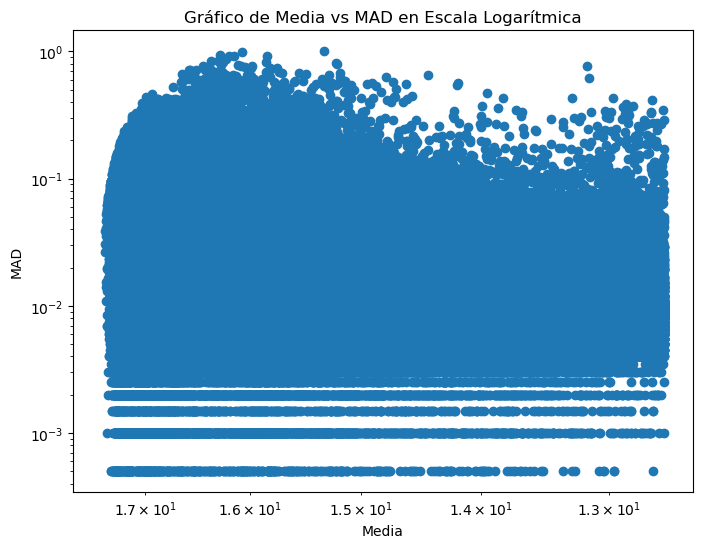

In [8]:
# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(medias1, mad_results1)
plt.xscale('log')  # Escala logarítmica en el eje x
plt.yscale('log')  # Escala logarítmica en el eje y
plt.xlabel('Media')
plt.ylabel('MAD')
plt.title('Gráfico de Media vs MAD en Escala Logarítmica')
# Invertir el eje x
plt.gca().invert_xaxis()
plt.show()

Cuartil 1: 3.0
Cuartil 2 (mediana): 20.0
Cuartil 3: 55.0


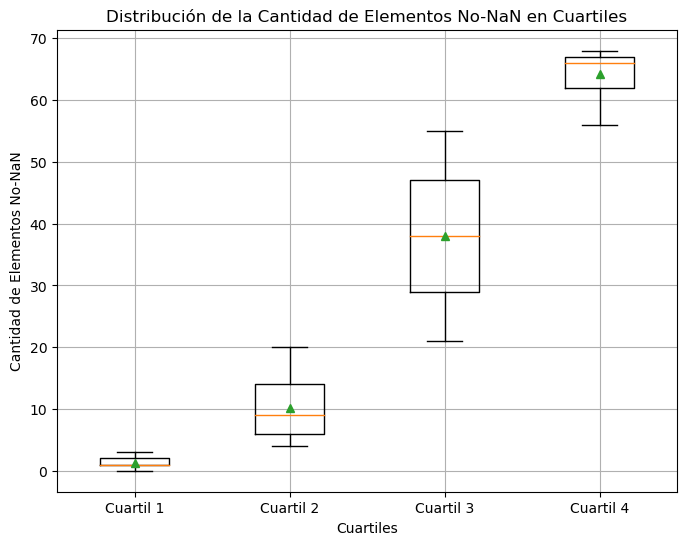

In [9]:
# Calcular la cantidad de elementos no-NaN en cada lista
cantidad_no_nan = np.sum(~np.isnan(series_ks_n), axis=1)

# Calcular los cuartiles
q1 = np.percentile(cantidad_no_nan, 25)
q2 = np.percentile(cantidad_no_nan, 50)
q3 = np.percentile(cantidad_no_nan, 75)

# Imprimir los cuartiles
print("Cuartil 1:", q1)
print("Cuartil 2 (mediana):", q2)
print("Cuartil 3:", q3)

# Dividir las cantidades de elementos no-NaN en cada cuartil
cuartil_1 = cantidad_no_nan[cantidad_no_nan <= q1]
cuartil_2 = cantidad_no_nan[(cantidad_no_nan > q1) & (cantidad_no_nan <= q2)]
cuartil_3 = cantidad_no_nan[(cantidad_no_nan > q2) & (cantidad_no_nan <= q3)]
cuartil_4 = cantidad_no_nan[cantidad_no_nan > q3]

# Realizar box plots para cada cuartil
plt.figure(figsize=(8, 6))
plt.boxplot([cuartil_1, cuartil_2, cuartil_3, cuartil_4], labels=['Cuartil 1', 'Cuartil 2', 'Cuartil 3', 'Cuartil 4'], showmeans=True)
plt.xlabel('Cuartiles')
plt.ylabel('Cantidad de Elementos No-NaN')
plt.title('Distribución de la Cantidad de Elementos No-NaN en Cuartiles')
plt.grid(True)
plt.show()


In [10]:
def eliminar_arrays_cortos(array):
    return [serie for serie in array if np.sum(~np.isnan(serie)) >= 55]
series_ks_n_filtrado = eliminar_arrays_cortos(series_ks_n)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
# Especifica el nombre del archivo FITS existente
nombre_archivo_fits = 'Totalcampob279.fits'

# Abre el archivo FITS existente en modo de actualización ('update')
with fits.open(nombre_archivo_fits, mode='update') as hdul:
    # Crea un nuevo HDU con el nuevo array
    nuevo_hdu = fits.ImageHDU(series_ks_n_filtrado, name='Ks')

    # Agrega el nuevo HDU al archivo FITS
    hdul.append(nuevo_hdu)

# Imprime un mensaje de confirmación
print(f"Nuevo HDU agregado al archivo FITS: {nombre_archivo_fits}")

Nuevo HDU agregado al archivo FITS: Totalcampob279.fits


In [3]:
archivo1 = fits.open('Totalcampob279.fits')
archivo1.info()

Filename: Totalcampob279.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  HJD           1 ImageHDU         7   (68,)   float64   
  2  KS            1 ImageHDU         8   (68, 306048)   float64   


In [4]:
serie_ks=archivo1[2].data
def seleccionar_subarrays_aleatorios(serie_ks, cantidad):
    return [random.choice(serie_ks) for _ in range(cantidad)]
cantidad_subarrays = 1000
ks_aleatorios = seleccionar_subarrays_aleatorios(serie_ks, cantidad_subarrays)

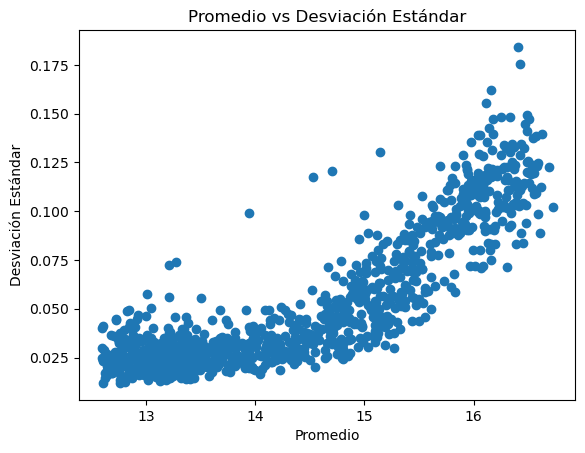

In [8]:
# Función para calcular el promedio excluyendo los NaN
def mean_without_nan(subarray):
    valid_values = [value for value in subarray if not np.isnan(value)]
    return np.mean(valid_values) if valid_values else np.nan

# Función para calcular la desviación estándar excluyendo los NaN
def std_without_nan(subarray):
    valid_values = [value for value in subarray if not np.isnan(value)]
    return np.std(valid_values) if valid_values else np.nan

# Calcula el promedio y la desviación estándar para cada subarray en ks_aleatorios
means = [mean_without_nan(subarray) for subarray in ks_aleatorios]
std_devs = [std_without_nan(subarray) for subarray in ks_aleatorios]

# Grafica la desviación estándar en el eje y y el promedio en el eje x
plt.scatter(means, std_devs)
plt.xlabel('Promedio')
plt.ylabel('Desviación Estándar')
plt.title('Promedio vs Desviación Estándar')
plt.show()

In [59]:
# Definir la función de ajuste
def funcion_ajuste(x, a, b, c):
    return a * x**2 + b * x + c # Ejemplo de una función cuadrática

# Ajustar la función a los datos
popt, _ = curve_fit(funcion_ajuste, means, std_devs)

# Parámetros óptimos encontrados
a_opt, b_opt, c_opt = popt

# Imprimir la función de ajuste
print(f"Función de ajuste: {a_opt:.2f}x^2 + {b_opt:.2f}x + {c_opt:.2f}")
print(popt)

Función de ajuste: 0.01x^2 + -0.25x + 1.66
[ 0.00939416 -0.2478275   1.65937396]


In [72]:
x=np.random.rand(11,20)
y= 0.01*x**2 -0.25*x + 1.66
z=y

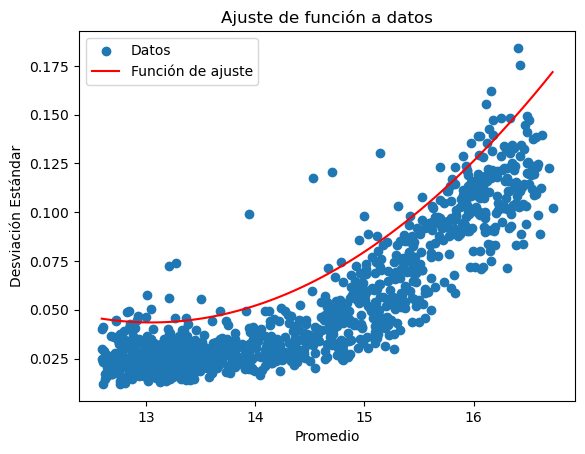

In [77]:
# Plotear los datos y la función de ajuste
plt.scatter(means, std_devs, label='Datos')
x_range = np.linspace(min(means), max(means), 100)
plt.plot(x_range, funcion_ajuste(x_range, *popt+0.00010), color='red', label='Función de ajuste')
plt.xlabel('Promedio')
plt.ylabel('Desviación Estándar')
plt.title('Ajuste de función a datos')
plt.legend()
plt.show()

In [79]:
# Convertir means a un array de NumPy si no lo es
means = np.array(means)

# Calcular los valores predichos por la función ajustada para todos los elementos de means
predicciones = funcion_ajuste(means, *popt+0.00010)

# Encontrar las posiciones donde std_devs está por encima de las predicciones
posiciones_por_encima = np.where(std_devs > predicciones)[0]

# Imprimir las posiciones por encima del ajuste
print("Posiciones por encima del ajuste:", posiciones_por_encima)
print(len(posiciones_por_encima))

Posiciones por encima del ajuste: [  5   7   8  25  36  83  90 102 151 168 182 190 206 210 218 228 255 295
 304 323 344 363 367 371 385 415 427 450 520 587 596 629 641 652 672 684
 712 759 765 809 822 876 918 946 951 967]
46


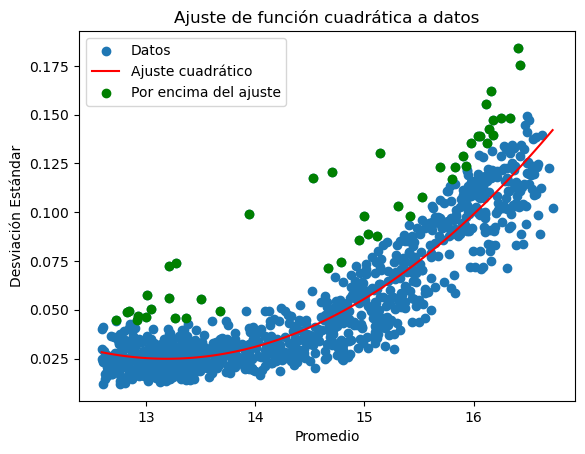

In [80]:
# Convertir means y std_devs a arrays de NumPy si no lo son
means = np.array(means)
std_devs = np.array(std_devs)

# Plotear los datos y la función de ajuste
plt.scatter(means, std_devs, label='Datos')
x_range = np.linspace(min(means), max(means), 100)
plt.plot(x_range, funcion_ajuste(x_range, *popt), color='red', label='Ajuste cuadrático')

# Plotear las posiciones por encima del ajuste cuadrático en otro color
plt.scatter(means[posiciones_por_encima], std_devs[posiciones_por_encima], color='green', label='Por encima del ajuste')

plt.xlabel('Promedio')
plt.ylabel('Desviación Estándar')
plt.title('Ajuste de función cuadrática a datos')
plt.legend()
plt.show()

In [89]:
# Nuevo array para almacenar la información correspondiente a las posiciones sobre el ajuste
posibles_variables = []

# Iterar sobre las posiciones por encima del ajuste
for pos in posiciones_por_encima:
    posibles_variables.append(ks_aleatorios[pos])

# Convertir la lista de subarrays a un array de NumPy
posibles_variables= np.array(posibles_variables)
print(len(posibles_variables))
print(posibles_variables [0])




46
[15.007 14.935 14.958 14.903 15.007 14.94  14.976 15.016 14.998 14.948
 14.944 14.972 14.895 14.967 15.023 15.007 14.985 15.047 15.029 15.079
 14.941 15.012 15.093 14.932 14.995 14.996 14.995 14.989 14.979 14.996
 14.97  15.061 15.034 14.975 15.127 15.01  15.011 15.026 15.025 15.067
 15.075 15.012 15.049 15.057 14.999 15.031 15.076 15.036 15.092 15.045
 15.04  15.089 15.125 15.044 14.963 15.045 15.093 15.521 15.059 15.075
 15.227 15.098 15.041 15.197 15.04  15.23  15.103    nan]


In [99]:
import pandas as pd

# Nombre del archivo
file_name = "superTemplateb279.dat"

# Carga el archivo en un DataFrame
df = pd.read_csv(file_name, delim_whitespace=True, header=None)

# Muestra el DataFrame
print(df)



KeyboardInterrupt



In [113]:
import csv

x=-1
for i in posibles_variables:
    # Tu array KS
    x+=1
    ks = i  # Por ejemplo
    # Tu array HJD
    hjd= archivo1[1].data  # Por ejemplo

    # Nombre del archivo
    file_name = "datos"+str(x)+".txt" 

    # Genera los valores de error
    error = np.random.uniform(0.00001, 0.0001, 46)

    # Abre el archivo en modo de escritura
    with open(file_name, mode='w') as file:
        # Escribe los datos en el archivo
        for ks_val, hjd_val, error_val in zip(ks, hjd, error):
            file.write(f"{hjd_val}\t{ks_val}\t{error_val}\n")
    print(hjd_val)
    print(ks_val)
    print(round(error_val,5))



2456790.65793362
15.031
7e-05
2456790.65793362
16.035
7e-05
2456790.65793362
16.336
4e-05
2456790.65793362
16.378
0.0001
2456790.65793362
15.122
6e-05
2456790.65793362
13.215
7e-05
2456790.65793362
14.723
5e-05
2456790.65793362
15.802
1e-05
2456790.65793362
13.056
2e-05
2456790.65793362
16.231
6e-05
2456790.65793362
15.751
0.0001
2456790.65793362
16.296
6e-05
2456790.65793362
14.65
0.0001
2456790.65793362
12.831
2e-05
2456790.65793362
12.735
4e-05
2456790.65793362
13.497
9e-05
2456790.65793362
16.519
4e-05
2456790.65793362
13.273
7e-05
2456790.65793362
12.887
9e-05
2456790.65793362
12.821
5e-05
2456790.65793362
15.934
7e-05
2456790.65793362
13.242
4e-05
2456790.65793362
15.012
6e-05
2456790.65793362
16.171
4e-05
2456790.65793362
12.983
4e-05
2456790.65793362
15.35
4e-05
2456790.65793362
14.917
8e-05
2456790.65793362
12.924
9e-05
2456790.65793362
15.915
1e-05
2456790.65793362
14.789
2e-05
2456790.65793362
16.007
2e-05
2456790.65793362
15.322
9e-05
2456790.65793362
16.227
8e-05
2456790.6

In [56]:
# Crear un objeto HDU (Header Data Unit) de tipo ImageHDU
hdu = fits.ImageHDU(posibles_variables, name='PV279')

# Crear un objeto HDUList que contiene el HDU
hdul = fits.HDUList([fits.PrimaryHDU(), hdu])

# Especificar el nombre del archivo FITS
nombre_archivo = 'PV.fits'

# Guardar el archivo FITS
hdul.writeto(nombre_archivo, overwrite=True)

# Imprimir un mensaje de confirmación
print(f"Archivo FITS creado con array_HJD: {nombre_archivo}")

Archivo FITS creado con array_HJD: PV.fits


In [59]:
archivo2 = fits.open('PV.fits')
archivo2.info()

Filename: PV.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  PV279         1 ImageHDU         8   (68, 44668)   float64   
  2  PV278         1 ImageHDU         8   (66, 42475)   float64   


In [65]:
HJD=nombre_archivo1[1].data
V_ks=archivo2[1].data[0]

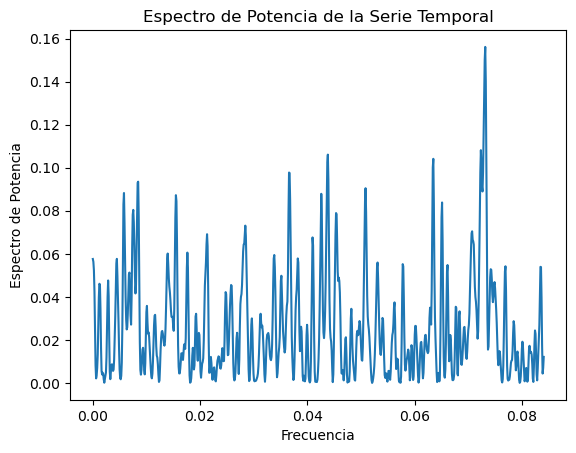

In [69]:
# Eliminar las posiciones con valores nan en V_ks y HJD
valid_indices = ~np.isnan(V_ks)
V_ks_valid = V_ks[valid_indices]
HJD_valid = HJD[valid_indices]

# Calcular el espectro de potencia utilizando Lomb-Scargle
frequency, power = LombScargle(HJD_valid, V_ks_valid).autopower()

# Plotear el espectro de potencia
plt.plot(frequency, power)
plt.xlabel('Frecuencia')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia de la Serie Temporal')
plt.show()

In [72]:
# Definir el número de picos que deseas identificar
n_picos = 3  # Por ejemplo, para identificar los tres picos más prominentes

# Encontrar los índices de los picos en el espectro de potencia
indices_picos = np.argpartition(power, -n_picos)[-n_picos:]
indices_picos_ordenados = indices_picos[np.argsort(-power[indices_picos])]

# Obtener las frecuencias y potencias de los picos
frecuencias_picos = frequency[indices_picos_ordenados]
potencias_picos = power[indices_picos_ordenados]

# Calcular los períodos correspondientes a las frecuencias de los picos
periodos_picos = 1 / frecuencias_picos

# Imprimir los períodos correspondientes a los picos
for i, periodo in enumerate(periodos_picos):
    print(f"Pico {i+1}: Periodo = {periodo:.2f} días, Potencia = {potencias_picos[i]:.2f}")

# Calcular el período promedio
periodo_promedio = np.mean(periodos_picos)

# Imprimir el período promedio
print(f"Periodo promedio = {periodo_promedio:.2f} días")



Pico 1: Periodo = 13.67 días, Potencia = 0.16
Pico 2: Periodo = 13.69 días, Potencia = 0.15
Pico 3: Periodo = 13.65 días, Potencia = 0.14
Periodo promedio = 13.67 días


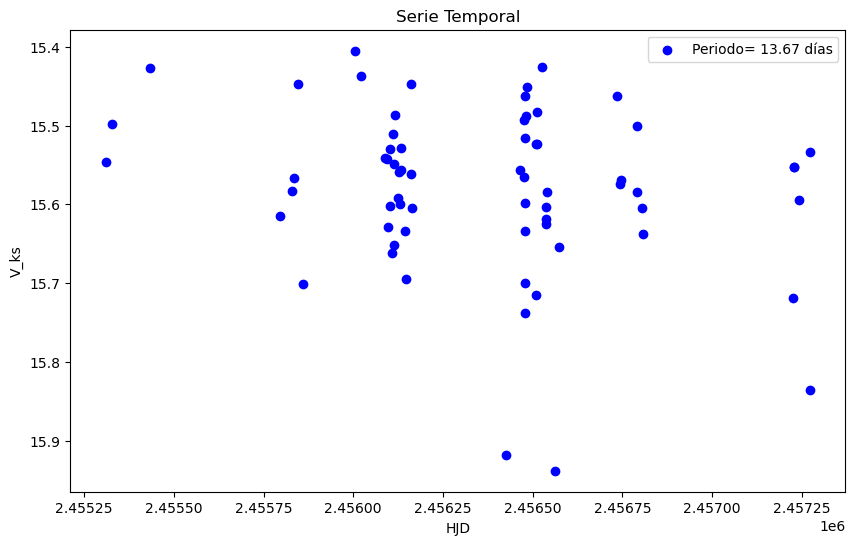

In [77]:
# Gráfica de la serie V_ks vs HJD
plt.figure(figsize=(10, 6))
plt.scatter(HJD, V_ks, color='blue', label='V_ks vs HJD')
plt.xlabel('HJD')
plt.ylabel('V_ks')
plt.title('Serie Temporal')
plt.gca().invert_yaxis()
# Muestra la leyenda con el período promedio
plt.legend(['Periodo= {:.2f} días'.format(periodo_promedio)])
plt.show()

In [94]:
# Creamos la carpeta si no existe
Curvas_PV = 'Curvas_PV'
if not os.path.exists(Curvas_PV):
    os.makedirs(Curvas_PV)
archivo1 = fits.open('Totalcampob279.fits')
archivo1.info()

Filename: Totalcampob279.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  HJD           1 ImageHDU         7   (68,)   float64   
  2  KS            1 ImageHDU         8   (68, 306048)   float64   


In [ ]:
x=-1
for i in archivo2[1].data:
    HJD=archivo1[1].data
    V_ks=i
    x+=1
    # Eliminar las posiciones con valores nan en V_ks y HJD
    valid_indices = ~np.isnan(V_ks)
    V_ks_valid = V_ks[valid_indices]
    HJD_valid = HJD[valid_indices]

    # Calcular el espectro de potencia utilizando Lomb-Scargle
    frequency, power = LombScargle(HJD_valid, V_ks_valid).autopower()

    # Plotear el espectro de potencia
    plt.plot(frequency, power)
    plt.xlabel('Frecuencia')
    plt.ylabel('Espectro de Potencia')
    plt.title('Espectro de Potencia de la Serie Temporal ' + str(x))
    nombre_archivo = os.path.join(Curvas_PV, 'Espectro de Potencia de la Serie Temporal ' + str(x)+'.png')
    plt.savefig(nombre_archivo)
    
    # Definir el número de picos que deseas identificar
    n_picos = 3  # Por ejemplo, para identificar los tres picos más prominentes

    # Encontrar los índices de los picos en el espectro de potencia
    indices_picos = np.argpartition(power, -n_picos)[-n_picos:]
    indices_picos_ordenados = indices_picos[np.argsort(-power[indices_picos])]

    # Obtener las frecuencias y potencias de los picos
    frecuencias_picos = frequency[indices_picos_ordenados]
    potencias_picos = power[indices_picos_ordenados]

    # Calcular los períodos correspondientes a las frecuencias de los picos
    periodos_picos = 1 / frecuencias_picos

    # Calcular el período promedio
    periodo_promedio = np.mean(periodos_picos)
    
    # Gráfica de la serie V_ks vs HJD
    plt.figure(figsize=(10, 6))
    plt.scatter(HJD, V_ks, color='blue', label='V_ks vs HJD')
    plt.xlabel('HJD')
    plt.ylabel('V_ks')
    plt.title('Serie Temporal ' + str(x))
    plt.gca().invert_yaxis()
    # Muestra la leyenda con el período promedio
    plt.legend(['Periodo= {:.2f} días'.format(periodo_promedio)])
    nombre_archivo1 = os.path.join(Curvas_PV, 'Serie Temporal ' + str(x)+'.png')
    plt.savefig(nombre_archivo1)
    print("Guardado")


Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado


C:\Users\camil\AppData\Local\Temp\ipykernel_14264\3711441360.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
G

Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
G

Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
G

Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
G

Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
G

Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
G

Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
Guardado
G